# Drawing molecules with EPAM's Indigo cheminformatics library

Exploring other cheminformatics toolkits besides the RDKit, I wanted to try [EPAM Indigo Toolkit](https://lifescience.opensource.epam.com/indigo/index.html). The [Indigo Toolkit is free and open-source](https://github.com/epam/Indigo) with Apache License 2.0, so it can be used in proprietary software.

I was unable to find simple examples of drawing molecules in a Python Jupyter Notebook, so here's how to do that. This post also demonstrates how to save molecular images to a file.

In general the official [documentation for Indigo](https://lifescience.opensource.epam.com/indigo/index.html#documentation) is much less than for the RDKit, as are the examples posted by users online. As a form of documentation, below I specify Indigo argument names, and am more pedantic about including code blocks and outputs.

## Import and initialize Indigo modules

Indigo works a little differently than the RDKit: With Indigo, you start by creating an instance of the class for Indigo or its renderer; then you can use the class's methods.

In [52]:
from indigo import Indigo
from indigo.renderer import IndigoRenderer

In [53]:
# Initialize Indigo and IndigoRenderer
indigo = Indigo()
renderer = IndigoRenderer(indigo)

To display the images in a Jupyter Notebook, we use IPython display modules.

In [54]:
from IPython.display import display, SVG, Image

## Set an Indigo option for all images

As a first example of performing an operation in Indigo, let's set a drawing [option](https://lifescience.opensource.epam.com/indigo/options/index.html) that will apply to the rest of this post. This option, `render-margins`, sets the "Horizontal and vertical margins around the image, in pixels."

In [55]:
indigo.setOption("render-margins", 10, 10)

It's helpful to have such fine control of drawing. Compared to the RDKit, I found Indigo's syntactical structure less transparent because you supply the option name in quotes, meaning you don't get a list of parameter name options, or autocomplete in an IDE (integrated development environment).

## Draw a single molecule with Indigo Renderer

### Set up a single molecule

One nice feature of Indigo is that it will convert from a chemical name to a molecule, so you don't need to compose the SMILES.

In [56]:
name = "3-ethyl-octane"
mol = indigo.nameToStructure(name)

Once you have the molecule, you can get the SMILES using the molecule's `smiles` method.

In [57]:
mol.smiles()

'CCC(CCCCC)CC'

### Display an Indigo molecular structure in the notebook

I was able to render a molecular structure in a Jupyter Notebook using either PNG or SVG format. In each code block, we start by setting the `render-output-format` option to the desired graphics format. The Jupyter Notebook command to display the image varies depending on the image format.

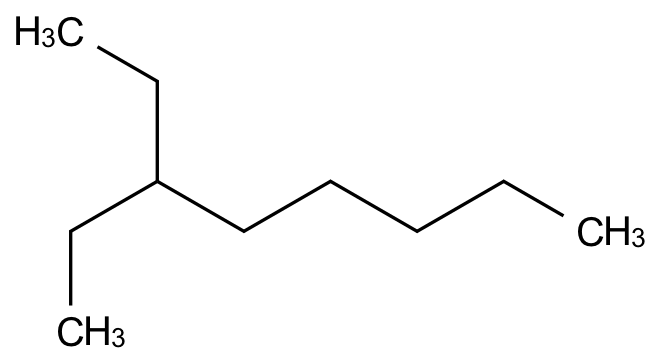

In [58]:
indigo.setOption("render-output-format", "png")
img = renderer.renderToBuffer(
    obj=mol,
)
display(Image(img))

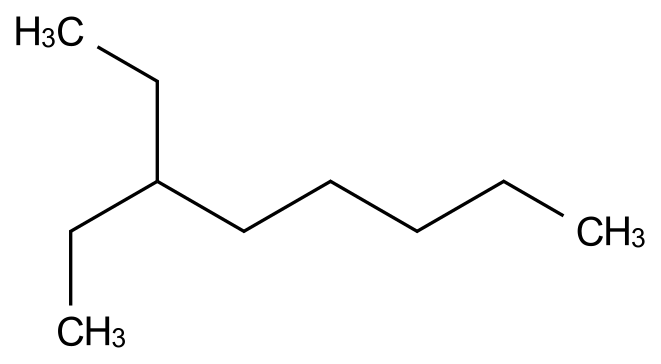

In [59]:
indigo.setOption("render-output-format", "svg")
mol_svg = renderer.renderToBuffer(
    obj=mol,
)
display(SVG(mol_svg))

Taking a different approach than the RDKit, Indigo renders terminal carbon atoms explicitly (CH<sub>3</sub> here) rather than implicitly as vertices.

### Write an Indigo molecular structure to a file

Similarly, we can save a molecular structure to a file in either PNG or SVG format.

In [60]:
indigo.setOption("render-output-format", "png")
mol.layout()
renderer.renderToFile(
    obj=mol,
    filename="../images/indigo/mol.png",
)

Here's the image in the PNG file:

![3-ethyl-octane molecular structure](../images/indigo/mol.png)

In [61]:
indigo.setOption("render-output-format", "svg")
mol.layout()
renderer.renderToFile(
    obj=mol,
    filename="../images/indigo/mol.svg",
)

And the SVG file has the same molecular structure:

![3-ethyl-octane molecular structure](../images/indigo/mol.svg)

## Draw a grid of molecules with Indigo Renderer

Often we want to draw a grid of molecular structures to show similarities amongst them, depict the results of a query, etc.

### Set up an array of Indigo molecules

First let's create a list of molecules based on cyclohexane.

In [62]:
names = [
    "cyclohexane",
    "1-methyl-cyclohexane",
    "1,2-dimethyl-cyclohexane",
    "1,3-dimethyl-cyclohexane",
    "1,4-dimethyl-cyclohexane",
    "1,2,3-trimethyl-cyclohexane",
]

In Indigo, we use `createArray()` to create an array of molecules to later draw in a grid. Let's set the property `grid-comment` of each molecule to its name so we can later display its name in the drawing grid.

In [63]:
array = indigo.createArray()
for n in names:
    this_mol = indigo.nameToStructure(n)
    this_mol.layout()
    this_mol.setProperty("grid-comment", n)
    array.arrayAdd(this_mol)

In the options below, `title` refers to the label under each molecule in the grid. The title will be the molecule's name because that's what we previously set `grid-comment` to. Again, the granular ability to set specific layout properties, such as vertical and horizontal spacing, is nice.

In [64]:
# Set the label under each molecule
indigo.setOption("render-grid-title-property", "grid-comment")

# Set the vertical offset of the label under each molecule
indigo.setOption("render-grid-title-offset", "15")

# Set the spacing between grid cells as horizontal and vertical pixels
indigo.setOption("render-grid-margins", "70, 70")

### Display a grid of Indigo molecular structures in the notebook as a PNG

Now we can draw a grid of molecules using `renderGridToBuffer`. We pass the `array` of molecules as the `objects` parameter. Similar to the RDKit, we can specify the number of columns, here with `ncolumns`. The parameter [`refatoms` can be used to align structures to have the same orientation](https://ctr.fandom.com/wiki/Align_the_depiction_using_a_fixed_substructure#Indigo/Python), though the code below doesn't set it to anything.

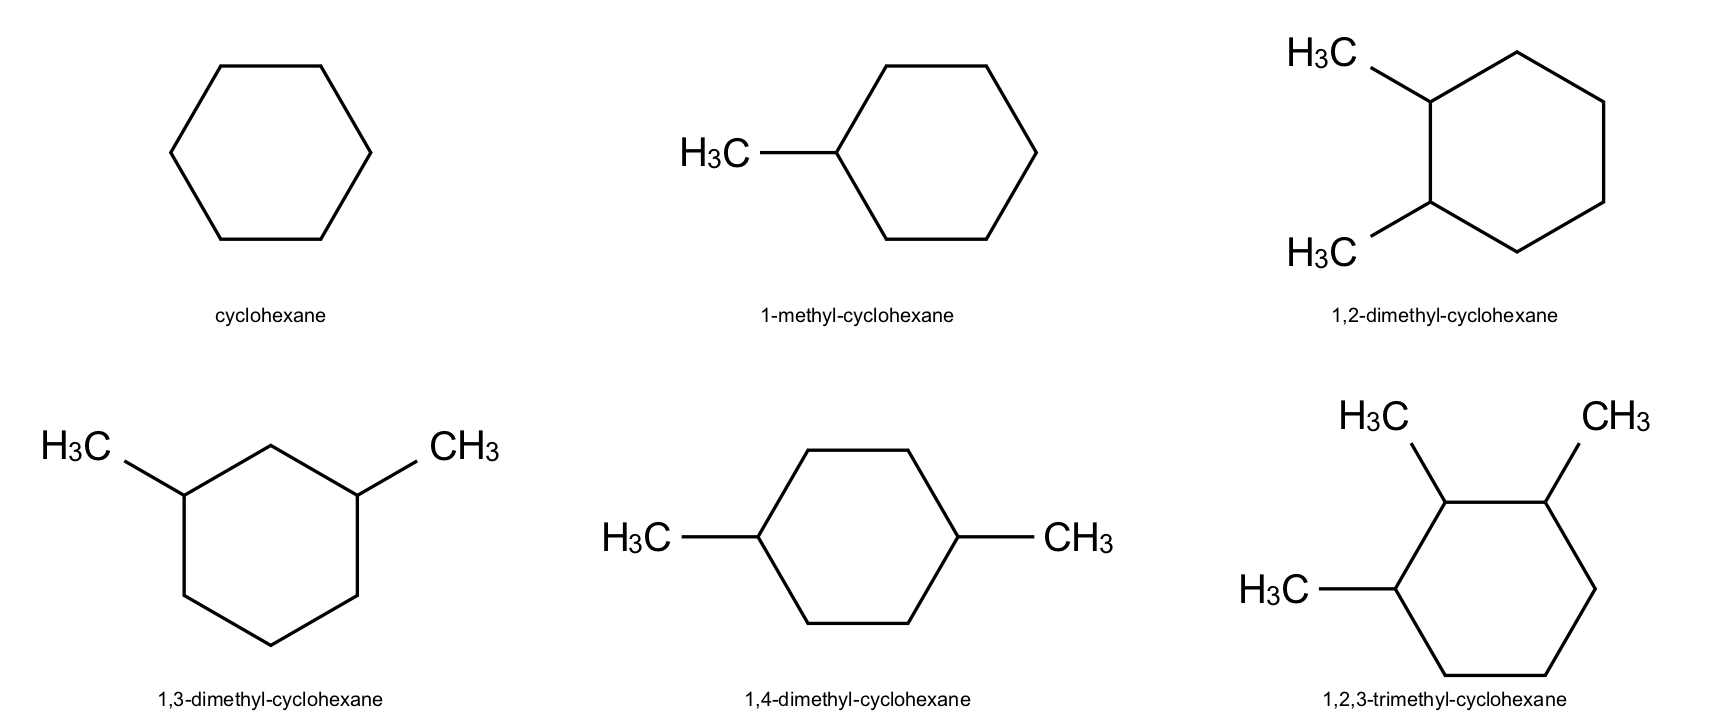

In [65]:
indigo.setOption("render-output-format", "png")
img_grid_png = renderer.renderGridToBuffer(
    objects=array,
    refatoms=None,
    ncolumns=3,
)
display(Image(img_grid_png))

### Display a grid of Indigo molecular structures in the notebook as an SVG

The output from this has been intermittently problematic: the molecular structures have come out distorted, perhaps due to some issue with writing or displaying the SVG format. The [SVG format](https://en.wikipedia.org/wiki/SVG) specifies graphical elements and their locations, which has the advantages of vector graphics but this possible issue. On the other hand, [PNG](https://en.wikipedia.org/wiki/PNG) is a raster-graphics format where the image is specified as a grid of pixels, so it's not surprising that it doesn't have the same issue.

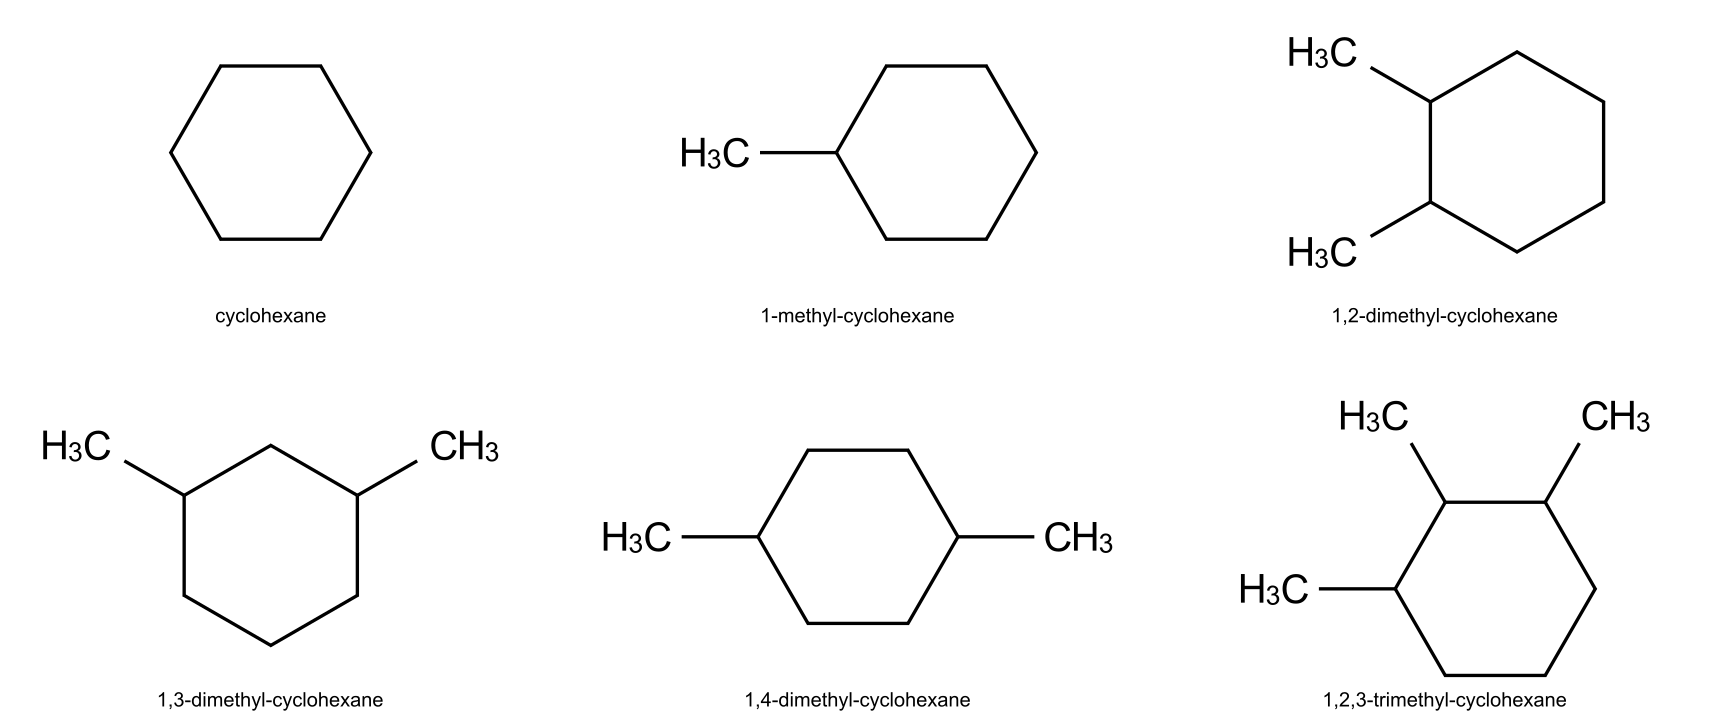

In [66]:
indigo.setOption("render-output-format", "svg")
img_grid = renderer.renderGridToBuffer(
    objects=array,
    refatoms=None,
    ncolumns=3,
)
display(SVG(img_grid))

### Write a grid of Indigo molecules to an image file

Both PNG and SVG formats are possible.

In [67]:
indigo.setOption("render-output-format", "png")
renderer.renderGridToFile(
    objects=array,
    refatoms=None,
    ncolumns=3,
    filename="../images/indigo/structures.png",
)

Here's the image in the PNG file:

![Molecular structures of six cyclohexanes](../images/indigo/structures.png)

In [68]:
indigo.setOption("render-output-format", "svg")
renderer.renderGridToFile(
    objects=array,
    refatoms=None,
    ncolumns=3,
    filename="../images/indigo/structures.svg",
)

Here's the image in the PNG file:

![Molecular structures of six cyclohexanes](../images/indigo/structures.svg)

## Another resource

You can find other examples of how to use Indigo at [Chemistry Toolkit Rosetta Wiki](https://ctr.fandom.com/wiki/Chemistry_Toolkit_Rosetta_Wiki), which has code examples for common operations in cheminformatics toolkits such as Indigo, RDKit, CDK, OpenBabel, OpenEye, CACTVS, Cinfony, and Chemkit. The page [Depict a compound as an image](https://ctr.fandom.com/wiki/Depict_a_compound_as_an_image) is relevant to the goal of this post.